In [1]:
!pip install pycaret


     |████████████████████████████████| 288 kB 11.4 MB/s 
     |████████████████████████████████| 1.7 MB 76.2 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 15.5 MB 59.4 MB/s 
     |████████████████████████████████| 6.8 MB 73.8 MB/s 
     |████████████████████████████████| 1.3 MB 51.3 MB/s 
     |████████████████████████████████| 56 kB 4.8 MB/s 
     |████████████████████████████████| 2.0 MB 60.2 MB/s 
     |████████████████████████████████| 261 kB 73.7 MB/s 
     |████████████████████████████████| 167 kB 80.2 MB/s 
     |████████████████████████████████| 113 kB 68.0 MB/s 
     |████████████████████████████████| 86 kB 6.7 MB/s 
     |████████████████████████████████| 3.1 MB 55.5 MB/s 
     |████████████████████████████████| 675 kB 73.2 MB/s 
     |████████████████████████████████| 596 kB 49.9 MB/s 
     |████████████████

In [2]:
from pycaret.utils import enable_colab
enable_colab()

Colab mode enabled.


In [3]:
!wget -q https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv

In [4]:
import pandas as pd
df_wine = pd.read_csv('/content/winequality-white.csv',sep=';')
df_wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [42]:
df_wine['quality'] = df_wine.quality.astype('category')
df_wine.dtypes

fixed acidity            float64
volatile acidity         float64
citric acid              float64
residual sugar           float64
chlorides                float64
free sulfur dioxide      float64
total sulfur dioxide     float64
density                  float64
pH                       float64
sulphates                float64
alcohol                  float64
quality                 category
dtype: object

In [44]:
#check the shape of data
df_wine.shape

(4898, 12)

In [45]:
data = df_wine.sample(frac=0.9, random_state=786)
data_unseen = df_wine.drop(data.index)

data.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

print('Data for Modeling: ' + str(df_wine.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (4898, 12)
Unseen Data For Predictions: (490, 12)


In [46]:
from pycaret.classification import *
exp_mclf101 = setup(data = df_wine, target = 'quality', session_id=123) 

,Description,Value
0,session_id,123
1,Target,quality
2,Target Type,Multiclass
3,Label Encoded,"3: 0, 4: 1, 5: 2, 6: 3, 7: 4, 8: 5, 9: 6"
4,Original Data,"(4898, 12)"
5,Missing Values,False
6,Numeric Features,11
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


In [47]:
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.6645,0.1714,0.4135,0.6742,0.6525,0.4819,0.4890,0.668
rf,Random Forest Classifier,0.6590,0.1716,0.4108,0.6699,0.6474,0.4743,0.4810,0.904
lightgbm,Light Gradient Boosting Machine,0.6473,0.1659,0.4212,0.6508,0.6392,0.4639,0.4671,0.708
gbc,Gradient Boosting Classifier,0.5811,0.1566,0.3551,0.5870,0.5684,0.3535,0.3598,3.785
dt,Decision Tree Classifier,0.5680,0.1360,0.3856,0.5689,0.5676,0.3668,0.3671,0.036
ridge,Ridge Classifier,0.5245,0.0000,0.2317,0.4997,0.4679,0.2206,0.2433,0.016
lda,Linear Discriminant Analysis,0.5222,0.1427,0.2968,0.5017,0.4992,0.2511,0.2593,0.021
lr,Logistic Regression,0.5146,0.1399,0.2360,0.4751,0.4748,0.2196,0.2327,1.831
knn,K Neighbors Classifier,0.4603,0.1384,0.2478,0.4430,0.4450,0.1716,0.1735,0.131
nb,Naive Bayes,0.4387,0.1322,0.3239,0.4549,0.4248,0.2137,0.2231,0.018


In [48]:
dt = create_model('dt')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.5773,0.0000,0.4334,0.5818,0.5786,0.3854,0.3857
1,0.5481,0.0000,0.4549,0.5534,0.5490,0.3477,0.3487
2,0.5773,0.0000,0.4423,0.5802,0.5776,0.3836,0.3840
3,0.6093,0.0000,0.4090,0.6100,0.6093,0.4256,0.4257
4,0.5918,0.0000,0.3443,0.6005,0.5954,0.4017,0.4019
5,0.5539,0.0000,0.3381,0.5561,0.5535,0.3499,0.3505
6,0.5918,0.6989,0.3391,0.5952,0.5931,0.4027,0.4029
7,0.5481,0.6609,0.3237,0.5385,0.5428,0.3311,0.3314
8,0.5497,0.0000,0.4084,0.5453,0.5471,0.3332,0.3333
9,0.5322,0.0000,0.3634,0.5279,0.5298,0.3070,0.3071


In [49]:
#trained model object is stored in the variable 'dt'. 
print(dt)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')


In [50]:
knn = create_model('knn')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.4198,0.0000,0.2164,0.3951,0.4010,0.1024,0.1038
1,0.4315,0.0000,0.2340,0.4124,0.4186,0.1306,0.1316
2,0.4198,0.0000,0.2474,0.4043,0.4089,0.1182,0.1188
3,0.4344,0.0000,0.2278,0.4110,0.4189,0.1279,0.1295
4,0.4927,0.0000,0.2677,0.4818,0.4768,0.2163,0.2195
5,0.4111,0.0000,0.2175,0.3937,0.3974,0.0994,0.1003
6,0.5131,0.6922,0.2881,0.5013,0.5020,0.2625,0.2641
7,0.5219,0.6914,0.2447,0.4903,0.4997,0.2665,0.2691
8,0.5117,0.0000,0.2919,0.5024,0.4960,0.2473,0.2509
9,0.4474,0.0000,0.2424,0.4372,0.4303,0.1448,0.1471


In [51]:
lr = create_model('lr')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.5131,0.0000,0.2463,0.4768,0.4782,0.2209,0.2313
1,0.5190,0.0000,0.2435,0.4807,0.4806,0.2257,0.2403
2,0.5219,0.0000,0.2412,0.4840,0.4788,0.2245,0.2428
3,0.5452,0.0000,0.2653,0.5126,0.5127,0.2745,0.2858
4,0.4723,0.0000,0.2266,0.4390,0.4413,0.1561,0.1633
5,0.5044,0.0000,0.2287,0.4385,0.4482,0.1970,0.2123
6,0.5073,0.6844,0.2018,0.4730,0.4611,0.2000,0.2176
7,0.5335,0.7143,0.2189,0.4972,0.4956,0.2534,0.2684
8,0.5058,0.0000,0.2364,0.4673,0.4626,0.2028,0.2148
9,0.5234,0.0000,0.2515,0.4821,0.4890,0.2408,0.2506


In [52]:
tuned_dt = tune_model(dt)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.5364,0.0000,0.3802,0.5395,0.5350,0.3248,0.3265
1,0.5277,0.0000,0.3291,0.5173,0.5222,0.2987,0.2990
2,0.5306,0.0000,0.3210,0.5227,0.5246,0.2934,0.2945
3,0.5452,0.0000,0.3565,0.5448,0.5438,0.3232,0.3237
4,0.5219,0.0000,0.3155,0.5179,0.5183,0.2872,0.2876
5,0.5306,0.0000,0.2987,0.5111,0.5189,0.2948,0.2958
6,0.5015,0.6633,0.2834,0.4934,0.4946,0.2484,0.2498
7,0.5481,0.7431,0.3044,0.5473,0.5469,0.3359,0.3363
8,0.5468,0.0000,0.3462,0.5420,0.5417,0.3170,0.3185
9,0.5497,0.0000,0.3190,0.5321,0.5375,0.3218,0.3225


In [53]:
#tuned model object is stored in the variable 'tuned_dt'. 
print(tuned_dt)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=16, max_features='log2', max_leaf_nodes=None,
                       min_impurity_decrease=0.0002, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')


In [54]:
import numpy as np
tuned_knn = tune_model(knn, custom_grid = {'n_neighbors' : np.arange(0,50,1)})

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.4723,0.0000,0.3047,0.4723,0.4592,0.2250,0.2296
1,0.4519,0.0000,0.3026,0.4536,0.4424,0.1832,0.1854
2,0.4723,0.0000,0.2850,0.4998,0.4568,0.2146,0.2212
3,0.5160,0.0000,0.2819,0.5105,0.5039,0.2791,0.2829
4,0.4519,0.0000,0.4421,0.4891,0.4466,0.1842,0.1882
5,0.4840,0.0000,0.3106,0.4798,0.4714,0.2459,0.2502
6,0.5190,0.6872,0.3639,0.5232,0.5098,0.2897,0.2939
7,0.4869,0.6741,0.3159,0.5033,0.4728,0.2290,0.2355
8,0.4561,0.0000,0.2848,0.4993,0.4492,0.1958,0.2002
9,0.5058,0.0000,0.2808,0.5147,0.4891,0.2597,0.2683


In [55]:
tuned_lr = tune_model(lr)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.5190,0.0000,0.2485,0.4823,0.4835,0.2286,0.2405
1,0.5335,0.0000,0.2529,0.4945,0.4965,0.2508,0.2655
2,0.5190,0.0000,0.2421,0.4792,0.4806,0.2245,0.2398
3,0.5539,0.0000,0.2647,0.5220,0.5167,0.2823,0.2986
4,0.4752,0.0000,0.2297,0.4438,0.4460,0.1616,0.1689
5,0.5160,0.0000,0.2361,0.4588,0.4635,0.2166,0.2332
6,0.5015,0.6935,0.2725,0.4689,0.4627,0.2000,0.2137
7,0.5073,0.7111,0.2799,0.4696,0.4750,0.2178,0.2273
8,0.5175,0.0000,0.2412,0.4786,0.4736,0.2189,0.2338
9,0.5263,0.0000,0.2532,0.4832,0.4912,0.2472,0.2561


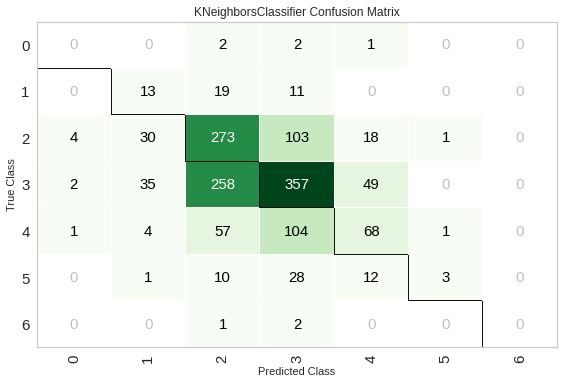

In [56]:
plot_model(tuned_knn, plot = 'confusion_matrix')

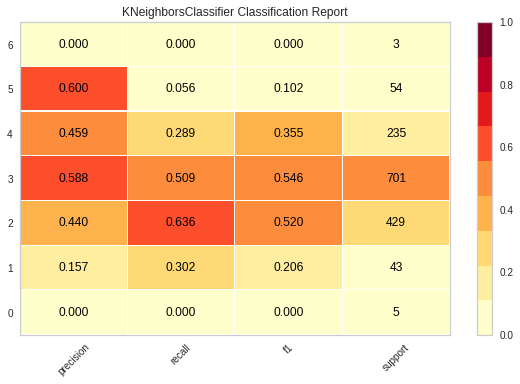

In [57]:
plot_model(tuned_knn, plot = 'class_report')

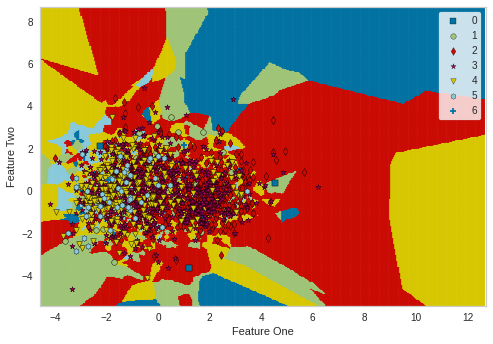

In [58]:
plot_model(tuned_knn, plot='boundary')

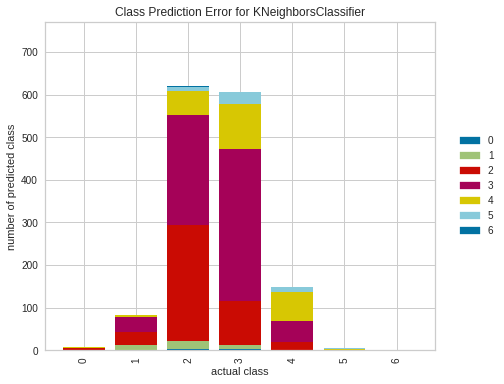

In [59]:
plot_model(tuned_knn, plot = 'error')

In [60]:
evaluate_model(tuned_knn)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [61]:
predict_model(tuned_knn);

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,K Neighbors Classifier,0.4857,0.6571,0.2561,0.509,0.4787,0.2233,0.2278


In [62]:
final_knn = finalize_model(tuned_knn)

In [63]:
#Final K Nearest Neighbour parameters for deployment
print(final_knn)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=2, p=2,
                     weights='uniform')


In [64]:
unseen_predictions = predict_model(final_knn, data=data_unseen)
unseen_predictions.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Label,Score
0,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,6,1.0
1,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,6,1.0
2,8.6,0.23,0.40,4.2,0.035,17.0,109.0,0.9947,3.14,0.53,9.7,5,5,1.0
3,6.6,0.16,0.40,1.5,0.044,48.0,143.0,0.9912,3.54,0.52,12.4,7,7,1.0
4,7.4,0.34,0.42,1.1,0.033,17.0,171.0,0.9917,3.12,0.53,11.3,6,5,0.5


In [65]:
save_model(final_knn,'Final KNN Model 08Feb2020')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[], target='quality',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_stra...
                 ('fix_perfect', Remove_100(target='quality')),
                 ('clean_names', Clean_Colum_Names()),
                 ('feature_select', 'passthrough'), ('fix_multi', 'passthrough'),
                 ('dfs', 'passthrough'), ('pca', 'passthrough'),
        

In [66]:
saved_final_knn = load_model('Final KNN Model 08Feb2020')

Transformation Pipeline and Model Successfully Loaded


In [67]:
new_prediction = predict_model(saved_final_knn, data=data_unseen)

In [68]:
new_prediction.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Label,Score
0,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,6,1.0
1,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,6,1.0
2,8.6,0.23,0.40,4.2,0.035,17.0,109.0,0.9947,3.14,0.53,9.7,5,5,1.0
3,6.6,0.16,0.40,1.5,0.044,48.0,143.0,0.9912,3.54,0.52,12.4,7,7,1.0
4,7.4,0.34,0.42,1.1,0.033,17.0,171.0,0.9917,3.12,0.53,11.3,6,5,0.5
